**Классификация изображений**

Создадим классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST.

In [ ]:
import numpy as np  # Импорт библиотеки для работы с массивами и векторной алгеброй
from sklearn.metrics import accuracy_score  # Импорт функции для оценки точности модели
from matplotlib import pyplot as plt  # Импорт библиотеки для визуализации данных

# Настройка для отображения графиков непосредственно в блокноте (например, в Jupyter)
%matplotlib inline

import tensorflow as tf  # Импорт библиотеки TensorFlow для создания и обучения нейронных сетей
print("We're using TF", tf.__version__)  # Вывод версии TensorFlow
import tensorflow.keras as keras  # Импорт высокоуровневого API Keras для TensorFlow
import tensorflow.keras.models as M  # Импорт функционала для создания моделей в Keras
import tensorflow.keras.layers as L  # Импорт слоев для нейронных сетей в Keras
import tensorflow.keras.backend as K  # Импорт функций для низкоуровневой работы с тензорами и графами в Keras
import pandas as pd  # Импорт библиотеки для работы с данными в табличном виде (DataFrame)
from tensorflow.keras.backend import clear_session

We're using TF 2.17.0


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Пример кусочка картинки:


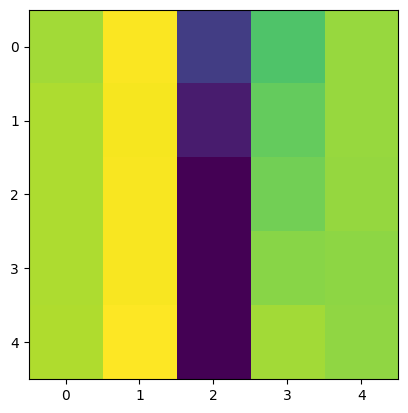

Пример картинки:


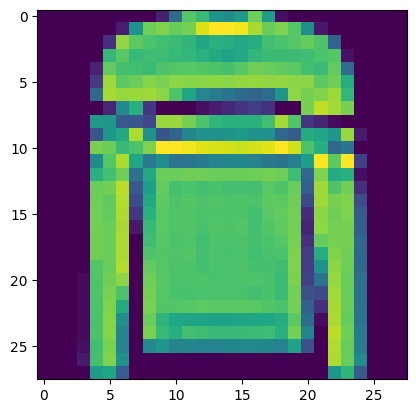

y_train [shape (60000,)] 10 примеров:
 [9 0 0 3 0 2 7 2 5 5]


In [ ]:
X_train_image = X_train[5, :, :]

# Вывод примера части изображения
print("Пример кусочка картинки:")
plt.imshow(X_train_image[15:20, 5:10])  # Отображение небольшого фрагмента изображения (с 15 по 20 строку и с 5 по 10 столбец)
plt.show()  # Показать фрагмент изображения

# Вывод всего изображения
print("Пример картинки:")
plt.imshow(X_train_image)  # Отображение всего изображения с использованием цветовой карты "Greys" для оттенков серого
plt.show()  # Показать полное изображение

# Вывод первых 10 значений из y_train и информации о форме массива y_train
print("y_train [shape %s] 10 примеров:\n" % (str(y_train.shape)), y_train[:10])  # Печать формы массива y_train и первых 10 меток (классов) для изображений

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
# one-hot encode для ответов
# Преобразуем метки классов y_train и y_val в формат one-hot
# Каждая метка будет представлена бинарным вектором длины 10 (по количеству классов)
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_test_oh = keras.utils.to_categorical(y_test, 10)

print(y_train_oh.shape) # Выводим форму one-hot закодированных меток
print(y_train_oh[:5], y_train[:5]) # Выводим первые 5 one-hot меток и соответствующие оригинальные метки для проверки

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [9 0 0 3 0]


In [ ]:
clear_session()

In [ ]:
# Очистка текущего графа и освобождение ресурсов TensorFlow/Keras
K.clear_session()

model = M.Sequential()

model.add(L.Conv2D(16, kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 1)))

model.add(L.MaxPool2D())

model.add(L.Conv2D(32, kernel_size=3, strides=1, padding='same'))

model.add(L.MaxPool2D())

model.add(L.Conv2D(64, kernel_size=3, strides=1, padding='same'))

model.add(L.MaxPool2D())

model.add(L.Conv2D(64, kernel_size=3, strides=1, padding='same'))

model.add(L.MaxPool2D())

model.add(L.Flatten())

model.add(L.Dense(10, activation='softmax'))

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    X_train[:, :, :, np.newaxis],
    y_train_oh,
    batch_size=32,
    epochs=10,
    validation_data=(X_test[:, :, :, np.newaxis], y_test_oh)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9599 - loss: 0.1083 - val_accuracy: 0.9050 - val_loss: 0.3292
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9650 - loss: 0.0947 - val_accuracy: 0.9067 - val_loss: 0.3621
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9674 - loss: 0.0877 - val_accuracy: 0.9031 - val_loss: 0.3763
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9724 - loss: 0.0758 - val_accuracy: 0.9021 - val_loss: 0.3968
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9751 - loss: 0.0691 - val_accuracy: 0.8897 - val_loss: 0.4788
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9754 - loss: 0.0677 - val_accuracy: 0.9009 - val_loss: 0.4476
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9771 - loss: 0.0589 - val_accuracy: 0.9060 - val_loss: 0.4351
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9800 - loss: 0.055